In [2]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np

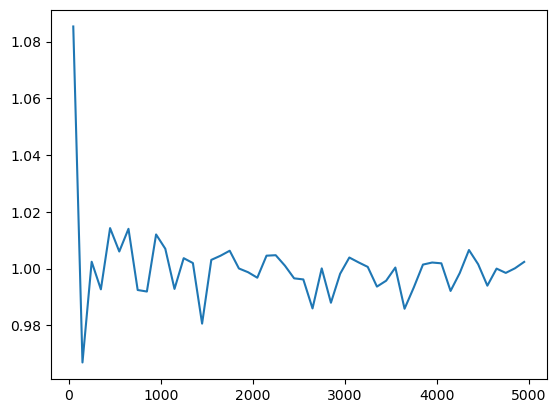

In [8]:
ratio = []
for d in range(50, 5000, 100):
    v = sketch = (torch.randn(20, d)) / math.sqrt(20)
    ratio.append(np.mean(np.linalg.norm(v, axis=0) ** 2))
plt.plot(torch.arange(50, 5000, 100), ratio)

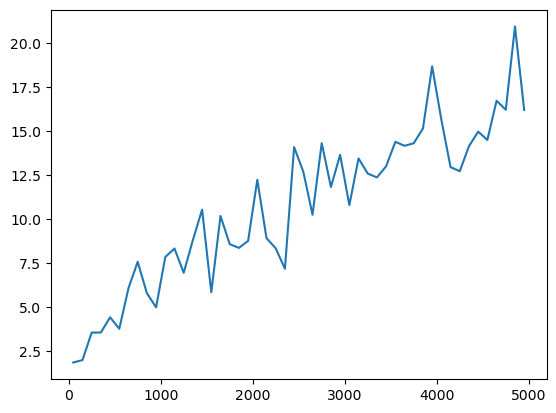

In [6]:
ratio = []
for d in range(50, 5000, 100):
    g = torch.rand(d) + 10
    sketch = (torch.randn(20, d)) / math.sqrt(20)
    sketched_g = sketch.T @ sketch @ g
    #ratio.append(torch.max(torch.abs(sketched_g)) / torch.max(torch.abs(g)))
    ratio.append(torch.linalg.norm(sketched_g)/torch.linalg.norm(g))
plt.plot(torch.arange(50, 5000, 100), ratio)

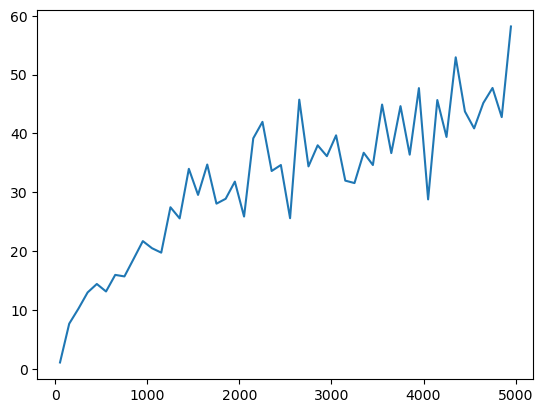

In [3]:
ratio = []
sum = []
for d in range(50, 50000, 1000):
    g = torch.rand(d) + 10
    sketch = (torch.randn(20, d)) / math.sqrt(20)
    sketched_g = sketch.T @ sketch @ g
    ratio.append(torch.norm(sketched_g) / torch.norm(g))
    sum.append(torch.sum(sketched_g) - torch.sum(g))
plt.plot(torch.arange(50, 5000, 100), ratio)
#plt.plot(torch.arange(50, 5000, 100), sum)

In [12]:
d = 50
sum = 0
samples = 20000
for _ in range(samples):
    g = torch.rand(d) + 10
    sketch = (torch.randn(20, d)) / math.sqrt(20)
    sketched_g = sketch.T @ sketch @ g
    sum += sketched_g - g
print(sum/samples)

tensor([ 0.1556, -0.0664,  0.1326,  0.2049, -0.0802, -0.1620,  0.1730,  0.0430,
         0.1208,  0.0406,  0.0669,  0.1050,  0.1285,  0.0177, -0.0810,  0.0154,
        -0.0317,  0.0023,  0.0381,  0.1175, -0.0495, -0.0517, -0.1061,  0.1957,
        -0.0249,  0.1164, -0.2098, -0.0136,  0.2116,  0.0487,  0.0602,  0.0118,
         0.0521,  0.0753,  0.0272, -0.0638,  0.1099, -0.0338, -0.2249, -0.0518,
        -0.0365, -0.0930,  0.0864,  0.0727,  0.0788,  0.2028,  0.1665,  0.1906,
        -0.1883, -0.0476])


In [4]:
sum

[tensor(-254.6975),
 tensor(1854.7422),
 tensor(-714.9844),
 tensor(2201.9453),
 tensor(1097.8125),
 tensor(-16091.4258),
 tensor(-11115.7461),
 tensor(-21076.2031),
 tensor(-11293.2812),
 tensor(4355.4922),
 tensor(-19190.5859),
 tensor(-33789.1094),
 tensor(32728.3906),
 tensor(904.5156),
 tensor(93406.6562),
 tensor(26338.9844),
 tensor(88693.9062),
 tensor(-11045.4375),
 tensor(-12145.2812),
 tensor(8899.6406),
 tensor(-70787.1875),
 tensor(95713.9688),
 tensor(139683.2500),
 tensor(-6942.7500),
 tensor(-156.4531),
 tensor(-125468.5156),
 tensor(170942.8438),
 tensor(-34606.4375),
 tensor(4853.3750),
 tensor(-32233.3750),
 tensor(15814.2188),
 tensor(-111367.0312),
 tensor(-127073.3594),
 tensor(-62338.5312),
 tensor(-104159.9219),
 tensor(59962.8125),
 tensor(-90805.9062),
 tensor(33215.2500),
 tensor(-119049.6875),
 tensor(72747.7500),
 tensor(-242890.3125),
 tensor(5697.5000),
 tensor(-116520.2812),
 tensor(135593.1562),
 tensor(-65729.2500),
 tensor(-118922.2188),
 tensor(-5797

In [22]:
torch.mean(torch.diag(sketch.T @ sketch))

tensor(1.0004)

256 tensor(0.0747)
512 tensor(0.0760)
1024 tensor(0.0775)
2048 tensor(0.0788)
4096 tensor(0.0794)


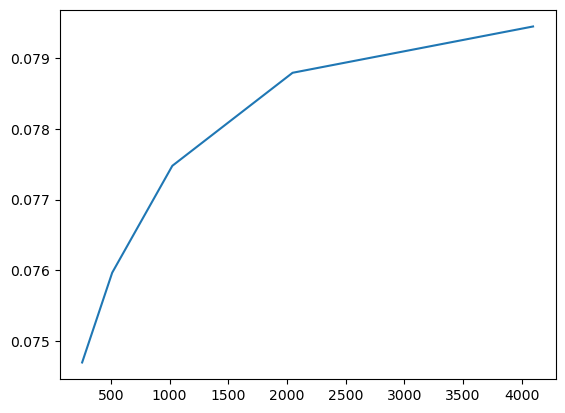

In [37]:
basis_std = math.sqrt(0.02)
init_wn_norm = []
for prev_width in [256, 512, 1024, 2048, 4096]:
    weight = torch.zeros(prev_width, prev_width)
    torch.nn.init.uniform_(weight, a=-basis_std/np.sqrt(prev_width), b=basis_std/np.sqrt(prev_width))
    #torch.nn.init.normal_(weight, 0, basis_std/np.sqrt(prev_width))
    print(prev_width, torch.min(torch.norm(weight, dim=1)))
    init_wn_norm.append(torch.min(torch.norm(weight, dim=1)))
plt.plot([256, 512, 1024, 2048, 4096], init_wn_norm)

In [3]:
"""
Comparison of manual BatchNorm2d layer implementation in Python and
nn.BatchNorm2d

@author: ptrblck
"""

import torch
import torch.nn as nn


def compare_bn(bn1, bn2):
    err = False
    if not torch.allclose(bn1.running_mean, bn2.running_mean):
        print('Diff in running_mean: {} vs {}'.format(
            bn1.running_mean, bn2.running_mean))
        err = True

    if not torch.allclose(bn1.running_var, bn2.running_var):
        print('Diff in running_var: {} vs {}'.format(
            bn1.running_var, bn2.running_var))
        err = True

    if bn1.affine and bn2.affine:
        if not torch.allclose(bn1.weight, bn2.weight):
            print('Diff in weight: {} vs {}'.format(
                bn1.weight, bn2.weight))
            err = True

        if not torch.allclose(bn1.bias, bn2.bias):
            print('Diff in bias: {} vs {}'.format(
                bn1.bias, bn2.bias))
            err = True

    if not err:
        print('All parameters are equal!')


class MyBatchNorm2d(nn.BatchNorm2d):
    def __init__(self, num_features, eps=1e-5, momentum=0.1,
                 affine=True, track_running_stats=True):
        print("in init")
        print(self.running_mean)
        super(MyBatchNorm2d, self).__init__(
            num_features, eps, momentum, affine, track_running_stats)
        print("in init")
        print(self.running_mean)

    def forward(self, input):
        print(self.running_mean)
        self._check_input_dim(input)

        exponential_average_factor = 0.0

        if self.training and self.track_running_stats:
            if self.num_batches_tracked is not None:
                self.num_batches_tracked += 1
                if self.momentum is None:  # use cumulative moving average
                    exponential_average_factor = 1.0 / float(self.num_batches_tracked)
                else:  # use exponential moving average
                    exponential_average_factor = self.momentum

        # calculate running estimates
        if self.training:
            mean = input.mean([0, 2, 3])
            # use biased var in train
            var = input.var([0, 2, 3], unbiased=False)
            n = input.numel() / input.size(1)
            #with torch.no_grad():
            self.running_mean = exponential_average_factor * mean\
                + (1 - exponential_average_factor) * self.running_mean
            # update running_var with unbiased var
            self.running_var = exponential_average_factor * var * n / (n - 1)\
                + (1 - exponential_average_factor) * self.running_var
            self.running_mean.retain_grad()
            #print(self.running_mean)
        else:
            mean = self.running_mean
            var = self.running_var

        input = (input - mean[None, :, None, None]) / (torch.sqrt(var[None, :, None, None] + self.eps))
        if self.affine:
            input = input * self.weight[None, :, None, None] + self.bias[None, :, None, None]

        return input


# Init BatchNorm layers
my_bn = MyBatchNorm2d(3, affine=True)
bn = nn.BatchNorm2d(3, affine=True)

#my_bn.running_mean.retain_grad()

compare_bn(my_bn, bn)  # weight and bias should be different
# Load weight and bias
my_bn.load_state_dict(bn.state_dict())
compare_bn(my_bn, bn)

# Run train
for run in range(10):
    print(run)
    scale = torch.randint(1, 10, (1,)).float()
    bias = torch.randint(-10, 10, (1,)).float()
    x = torch.randn(10, 3, 100, 100) * scale + bias
    out1 = my_bn(x)
    out2 = bn(x)
    
    torch.mean(out1).backward()
    print(my_bn.running_mean.grad)

    compare_bn(my_bn, bn)

    torch.allclose(out1, out2)
    print('Max diff: ', (out1 - out2).abs().max())

# Run eval
my_bn.eval()
bn.eval()
for _ in range(10):
    scale = torch.randint(1, 10, (1,)).float()
    bias = torch.randint(-10, 10, (1,)).float()
    x = torch.randn(10, 3, 100, 100) * scale + bias
    out1 = my_bn(x)
    out2 = bn(x)
    compare_bn(my_bn, bn)

    torch.allclose(out1, out2)
    print('Max diff: ', (out1 - out2).abs().max())

in init


AttributeError: 'MyBatchNorm2d' object has no attribute 'running_mean'

In [2]:
out2.shape

torch.Size([10, 3, 100, 100])

In [30]:
eta = 0.1
x = torch.nn.parameter.Parameter(torch.tensor(1.0))
y = torch.nn.parameter.Parameter(torch.tensor(2.0))
z = x * y
m = 2 * z
z.retain_grad()
(m + x**2).backward()

#x = x - eta * x.grad
#y = y - eta * y.grad
#x.grad, y.grad = None, None


In [31]:
x.grad

tensor(6.)

In [32]:
z.grad

tensor(2.)

0.7528911149676426
0.6814534238823878
0.6254730084501237


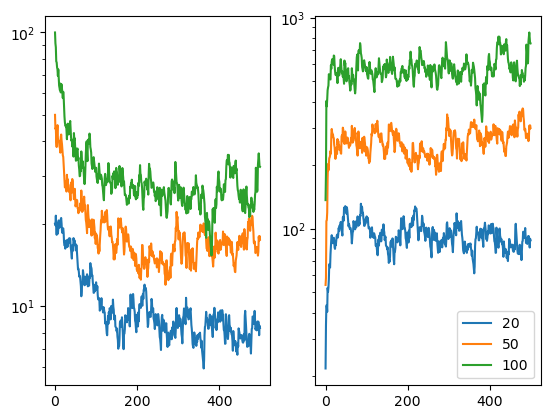

In [2]:
import numpy as np
import matplotlib.pyplot as plt
for d in [20, 50, 100]:
    sketch_d = 5
    base_g = np.ones(d)
    m, v = 0, 0
    l1norm = []
    l1norm_v = []
    for i in range(500):
        g_iter = base_g #+ np.random.rand(d) * 0.2
        R = np.random.randn(sketch_d, d)
        R2 = np.random.randn(sketch_d, d)
        m = 0.9 * m + 0.1 * R.T @ (R @ g_iter)
        v = 0.99 * v + 0.01 * (R.T @ (R @ g_iter)) ** 2
        update = m / np.sqrt(v)
        l1norm.append(np.sum(np.abs(update)))
        l1norm_v.append(np.sum(np.abs(m)))
    plt.subplot(1,2,1)
    plt.semilogy(l1norm)
    plt.subplot(1,2,2)
    plt.semilogy(l1norm_v)
    print(np.mean(l1norm[200:]) / (d**0.81))
#plt.plot(l1norm_v)
plt.legend([20, 50, 100, 500])

0.7842958193005897
0.6840933077340056
0.6482416334601249


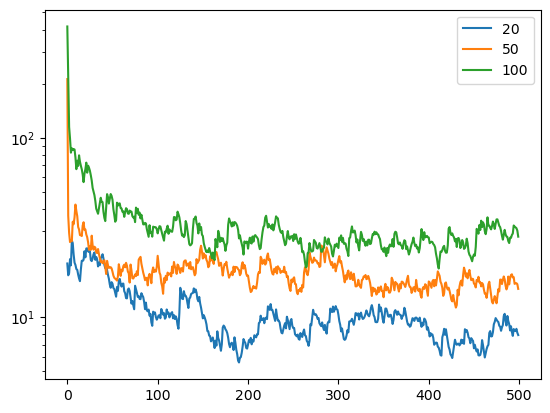

In [13]:
for d in [20, 50, 100]:
    sketch_d = 5
    base_g = np.ones(d)
    m, v = 0, 0
    l1norm = []
    l1norm_v = []
    for i in range(500):
        g_iter = base_g + np.random.rand(d) * 0.2
        R = np.random.randn(sketch_d, d)
        R2 = np.random.randn(sketch_d, d)
        m = 0.9 * m + 0.1 * R.T @ (R @ g_iter)
        v = 0.99 * v + 0.01 * (R2.T @ (R2 @ g_iter)) ** 2
        update = m / np.sqrt(v)
        l1norm.append(np.sum(np.abs(update)))
        l1norm_v.append(np.sum(np.abs(v)))
    #plt.subplot(1,2,1)
    plt.semilogy(l1norm)
    #plt.subplot(1,2,2)
    #plt.plot(l1norm_v)
    print(np.mean(l1norm[200:]) / (d**0.81))
#plt.plot(l1norm_v)
plt.legend([20, 50, 100, 500])

0.6800003253744504
0.6232929356813269
0.595397007858913


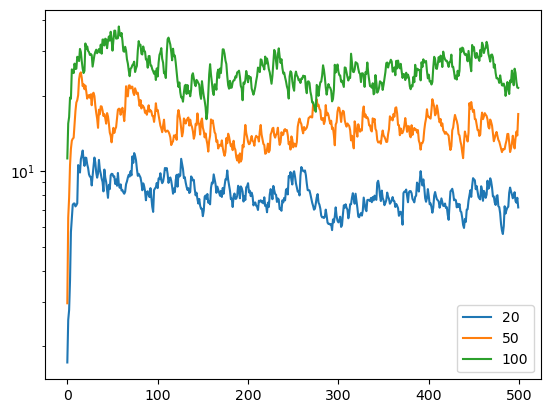

In [7]:
for d in [20, 50, 100]:
    sketch_d = 5
    base_g = np.ones(d)
    m, v = 0, 0
    l1norm = []
    l1norm_v = []
    for i in range(500):
        g_iter = base_g + np.random.rand(d) * 0.2
        R = np.random.randn(sketch_d, d)
        R2 = np.random.randn(sketch_d, d)
        m = 0.9 * m + 0.1 * R.T @ (R @ g_iter)
        v = 0.99 * v + 0.01 * R2.T @ (R2 @ g_iter**2) #(R2.T @ (R2 @ g_iter)) ** 2
        update = m / np.sqrt(v + 5)
        l1norm.append(np.linalg.norm(update))
        l1norm_v.append(np.sum(np.abs(v)))
    #plt.subplot(1,2,1)
    plt.semilogy(l1norm)
    #plt.subplot(1,2,2)
    #plt.plot(l1norm_v)
    print(np.mean(l1norm[200:]) / (d**0.81))
#plt.plot(l1norm_v)
plt.legend([20, 50, 100, 500])

1.986284852967163
2.1262819243004785
2.237336972430578


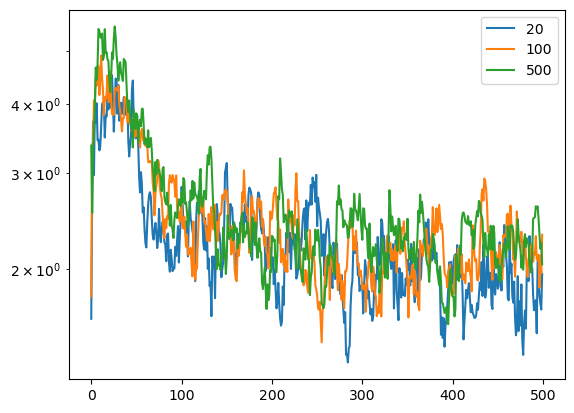

In [2]:
for d in [20, 100,500]:
    sketch_d = 5
    base_g = (np.ones(d)) / np.sqrt(d)
    m, v = 0, 0
    l1norm = []
    l1norm_v = []
    for i in range(500):
        g_iter = base_g + np.random.randn(d) * 0.2 / np.sqrt(d)
        R = np.random.randn(sketch_d, d)
        R2 = np.random.randn(sketch_d, d)
        m = 0.9 * m + 0.1 * R.T @ (R @ g_iter)
        v = 0.99 * v + 0.01 *  (R.T @ (R @ g_iter))**2 #(R2.T @ (R2 @ g_iter)) ** 2
        update = m / np.sqrt(v)
        l1norm.append(update @ g_iter)
        l1norm_v.append(np.sum(np.abs(v)))
    #plt.subplot(1,2,1)
    plt.semilogy(l1norm)
    #plt.subplot(1,2,2)
    #plt.plot(l1norm_v)
    print(np.mean(l1norm[200:]))
#plt.plot(l1norm_v)
plt.legend([20, 100, 500])

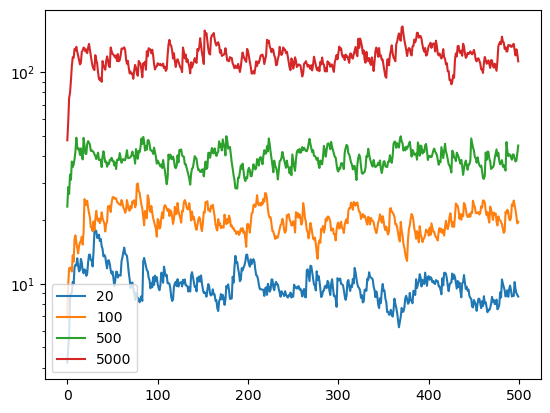

In [3]:
norm_max = []
for d in [20, 100,500, 5000]:
    grad_pred = np.random.randn(d) * 1 / np.sqrt(d)
    #grad_pred = np.ones(d)/ np.sqrt(d)
    sketch_d = 5
    base_g = (np.ones(d)) / np.sqrt(d)
    m, v = 0, 0
    l1norm = []
    l1norm_v = []
    for i in range(500):
        g_iter = base_g + np.random.randn(d) * 0.2 / np.sqrt(d)
        R = np.random.randn(sketch_d, d)
        R2 = np.random.randn(sketch_d, d)
        m = 0.9 * m +  0.1 * R.T @ (R @ g_iter)
        v = 0.99 * v + 0.01 * R2.T @ (R2 @ g_iter**2) #(R2.T @ (R2 @ g_iter)) ** 2
        #update = m / np.sqrt(v + 0.1)
        update = m / np.sqrt(v + 0.1)
        
        l1norm.append((update @ g_iter))
        l1norm_v.append(np.linalg.norm(update))
    #plt.subplot(1,2,1)
    #plt.semilogy(l1norm)
    #plt.semilogy(l1norm_v)
    norm_max.append(np.array(l1norm_v).max())
    #plt.plot(l1norm)
    #plt.subplot(1,2,2)
    #plt.plot(l1norm_v)
    #print(np.mean(l1norm[200:]))
#plt.plot(l1norm_v)
plt.legend([20, 100, 500, 5000])

In [17]:
import numpy as np

for d in [10, 50, 200]:
    sum_0 = 0
    sum = 0
    num_samples = 500
    for _ in range(num_samples):
        r1 = np.random.randn(d) / np.sqrt(d)
        r2 = np.random.randn(d) / np.sqrt(d)
        sum += (r1 @ r2) ** 2
        sum_0 += (r1 @ r1) ** 2
    print(sum_0/num_samples, sum/num_samples * d)

1.270749335107175 1.0491528877311467
1.079075571286142 0.9583491704796228
1.0036906225737654 0.9873285177828981


In [ ]:
import numpy as 
test_vec = 
R = np.random.randn(sketch_d, d)

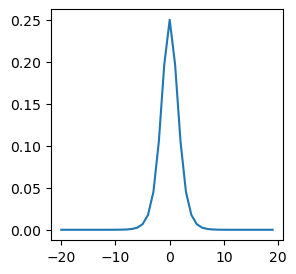

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-20, 20, 1)
y = np.exp(x) / ((1 + np.exp(x))**2)

plt.figure(figsize=(3,3))
plt.plot(x, y)

In [4]:
y

array([2.06115361e-09, 5.60279637e-09, 1.52299793e-08, 4.13993738e-08,
       1.12535149e-07, 3.05902133e-07, 8.31527336e-07, 2.26031919e-06,
       6.14413685e-06, 1.67011429e-05, 4.53958077e-05, 1.23379350e-04,
       3.35237671e-04, 9.10221180e-04, 2.46650929e-03, 6.64805667e-03,
       1.76627062e-02, 4.51766597e-02, 1.04993585e-01, 1.96611933e-01,
       2.50000000e-01, 1.96611933e-01, 1.04993585e-01, 4.51766597e-02,
       1.76627062e-02, 6.64805667e-03, 2.46650929e-03, 9.10221180e-04,
       3.35237671e-04, 1.23379350e-04, 4.53958077e-05, 1.67011429e-05,
       6.14413685e-06, 2.26031919e-06, 8.31527336e-07, 3.05902133e-07,
       1.12535149e-07, 4.13993738e-08, 1.52299793e-08, 5.60279637e-09])

In [ ]:
import numpy as np

a = np.rand(50)
alpha = 1.5

def func1(a):
    return np.linalg.norm(a)

def func2(a):
    return np.linalg.norm(a, ord=2*alpha)

func1(a)